In [1]:
# tensorflow packages
!pip install absl-py
!pip install tensorflow
!pip install tensorflow-hub
# seaborn
!pip install seaborn
# ML
!pip install scikit-learn
# Facebook's pytorch
!pip install torch
# Hugging face
!pip install transformers datasets

  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1b/66/2f47c39cfedb29188d82555d0184a619a0bf8234fd5e5301940efb0aa464/tensorflow-2.13.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2b/ad/d3a2e335004d178e0599cf8aff6c2a92cd21eb9789358fb8f3f951009930/tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.meta

In [1]:
# Normal packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

# Deep learning
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub

# Hugging Face
from transformers import pipeline

# Scikit-learn
from sklearn.cluster import KMeans

# NLP
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk

In [ ]:
'''Download some nltk required data opening conda prompt; run the below commands in the prompt as alternative'''
nltk.download('punkt')
nltk.download('stopwords')

>>> nltk.download('punkt')
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
True
>>> nltk.download('stopwords')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
True

In [2]:
# Universal sentence encoder (from Google)
USE_encoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to use USE encoder
def embed(input):
    return np.array(USE_encoder(input))

In [3]:

# Get sentiment model from hugging face platform

sentiment_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [4]:
def sentiment(input):
    result = sentiment_model(input[:512])
    sign = 1 if(result[0]['label']=="POSITIVE") else -1
    value = result[0]['score']
    return sign*value

Load The Data

In [5]:
df = pd.read_csv("drugLibTrain_raw.tsv", sep="\t")

df.shape

(3107, 9)

In [6]:
df.sample(10)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
1177,3047,seroquel,9,Highly Effective,Mild Side Effects,bipolar disorder,Manic episodes have been minimised! Although h...,"After an hour of taking Seroquel, if it hasn't...",mood stabiliser
1207,106,celebrex,8,Considerably Effective,No Side Effects,pain,"I am an athlete, tennis pro and avid golfer. I...",So far I have experienced no side effects. I h...,I have been taking Celebrex now for over five ...
362,44,norpramin,6,Moderately Effective,Mild Side Effects,migraine,no a.m. headaches,mild drowsiness,took away morning headaches until I was able t...
253,2945,mirapex,10,Highly Effective,No Side Effects,restless legs syndrome,My legs used to jump pretty badly and so did m...,I've heard that some people turn into gamblers...,I take a .25mg tablet every a.m. and then arou...
2695,1258,provigil,10,Considerably Effective,No Side Effects,fatigue from rheumatoid arthiritis,"I was able to function until later in the day,...","none, but since it is a brand name drug, my co...",I was diagnosed with RA in April 07 after 2 ye...
41,1762,topamax,6,Highly Effective,Mild Side Effects,"seizures,migraines,fibro.","To stop with the migraines, seizures and pain ...",alittle weight loss but I was thin already the...,take two 100 mgs tablets in am when I was give...
1028,4019,celexa,8,Highly Effective,Moderate Side Effects,depression,I had fewer swings in my mood. I felt down les...,I felt sleepy all the time. I was not alert at...,I was prescribed this medication by a doctor. ...
2310,115,celebrex,10,Highly Effective,No Side Effects,hip flexor & back pain,I feel like a new person. I've had an MRI and ...,NONE.,Took a pill. Swallowed.
1129,270,ditropan,1,Moderately Effective,Severe Side Effects,hyperhidrosis,"stopped sweating, but the drying effect brough...","very dry thoat and eyes, dry mouth, burning se...","the drug is not to treat hyperhidrosis, but it..."
1791,1130,evista,3,Ineffective,Moderate Side Effects,osteoporosis,I couldn't stay on it long enought to know if ...,"I soon started having blurred vision, then ext...",One 60 mg. pill per day. I increased my calci...


In [7]:
# Look at only the side effects
sideEffectsReviews = df['sideEffectsReview'].dropna().tolist()

Create topic model

In [36]:
class ReviewsTopicModel:

    STOPWORDS = stopwords.words('english') # stopwords from ntlk

    EMBEDDING_DIM = 512 # USE encoder

    # Constructor
    def __init__(self, reviews):
        self.X = self.clean(reviews)

    # Clean text method
    def clean(self, reviews):
        # Words to replace
        string_map = {'\r': '', '\n': '', '/': ' ', "'": "", '"': ''}
        reviews_cleaned = reviews[:]
        for i in range(len(reviews_cleaned)):
            for s in string_map:
                reviews_cleaned[i] = reviews_cleaned[i].replace(s, string_map[s]).lower() 
        # Transform the reviews into embeddings dataframe
        X = embed(reviews_cleaned)
        X = pd.DataFrame(X)
        X.index = reviews_cleaned
        return X

    # Method to determine number of topics (a.k.a kmeans cluster number)
    def elbow_plot(self):
        cluster_sizes = list(range(1, 81))
        cluster_scores = []
        for n in cluster_sizes:
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(self.X)
            cluster_scores.append(kmeans.inertia_)
        plt.figure()
        plt.plot(cluster_sizes, cluster_scores)
        plt.show()

    # Method to extract topics from text data
    def create_topics(self, num_topics):
        # Cluster the reviews
        kmeans = KMeans(n_clusters=num_topics)
        kmeans.fit(self.X)

        # Create the final topics dataframe
        topics_df = self.X.copy()
        topics_df['topic'] = kmeans.labels_.copy()
        topics_df['topic'] = topics_df['topic'].astype(int)

        # Create summary keywords per topic
        topic_keywords = {}
        for topic in topics_df['topic'].unique():
            topic_reviews = topics_df.query("topic == {}".format(topic)).index.tolist()
            topic_centroid = kmeans.cluster_centers_[topic] # cluster center
            topic_keywords[topic] = self.get_closest_words(topic_reviews, topic_centroid)
        topics_df['topic_keywords'] = topics_df['topic'].map(topic_keywords)

        # Score the sentiment of each review
        topics_df['sentiment'] = [sentiment(r) for r in topics_df.index.values.tolist()]

        # Final result
        self.topics_keywords = topic_keywords
        self.topics_df = topics_df.copy()[['topic', 'topic_keywords', 'sentiment']]


    def get_closest_words(self, reviews, centroid):
        word_distances = {}
        for r in reviews:
            review_words = [w for w in word_tokenize(r) if(w not in self.STOPWORDS)]
            for w in review_words:
                word_embedding = embed([w]) # return 512 dimensional vector for the word 'w'
                # how similar is the word embedding to the topic's centroid (avg of the cluster sample's embeddings)
                word_distances[w] = self.cosine_similarity(word_embedding, centroid) # 1 it means match, closer to 0 means different
        # done collecting the distances of the words to the topic's center
        top_5_keywords = sorted([(word_distances[w], w) for w in word_distances])[-5:]
        return ",".join([x[1] for x in top_5_keywords])

    def cosine_similarity(self, x, y):
        # x,y are both the appropriate dimension
        x = x.reshape(self.EMBEDDING_DIM,)
        y = y.reshape(self.EMBEDDING_DIM,)
        # calculate cosine similarity
        dotproduct = x.dot(y)
        x_mag = x.dot(x)**0.5
        y_mag = y.dot(y)**0.5
        # returns closer to 1 if x and y are similar, closer to 0 if they are different
        return dotproduct/(x_mag * y_mag)

Initialize model

In [37]:
topic_model = ReviewsTopicModel(sideEffectsReviews)

C:\Users\karar\anaconda3\envs\tm_p39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karar\anaconda3\envs\tm_p39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karar\anaconda3\envs\tm_p39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karar\anaconda3\envs\tm_p39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

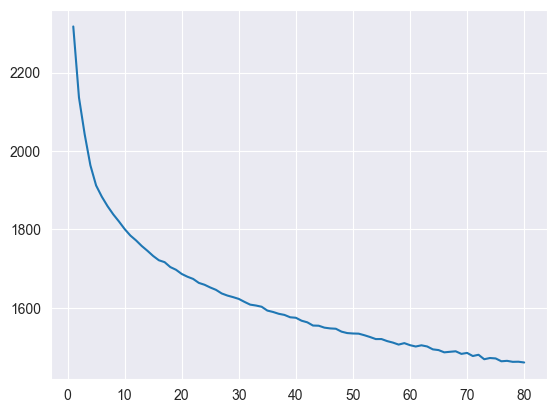

In [20]:
topic_model.elbow_plot() # going to use 40 clusters i.e. 40 topics

Create final model and evaluate

In [38]:
topic_model.create_topics(num_topics=40)

C:\Users\karar\anaconda3\envs\tm_p39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
topic_model.topics_df.query("topic == 5")

,topic,topic_keywords,sentiment
no side effects while on drug. super bad side effects while going off the drug. google searched it. lots of people with the same symptoms. read up before you start it.,5,"5mg,nsaid,accutane,effets,side-effects",-0.997506
"i had no side effects. some people think the ulcerated scabby areas are side effects, but this is what the cream is designed to do, make bad cells react and destruct.",5,"5mg,nsaid,accutane,effets,side-effects",-0.994292
there were no side effects associated with the drug. the doctor mentioned it would make birth control ineffective but had no confirmation of that.,5,"5mg,nsaid,accutane,effets,side-effects",-0.998825
nothing noticeable. soluble tablet has a slightly unpleasant aftertaste. unknown if my vitamin b12 levels have been affected.,5,"5mg,nsaid,accutane,effets,side-effects",-0.998706
no real side effects except infections (which the doctor said was normal???).,5,"5mg,nsaid,accutane,effets,side-effects",-0.999654
...,...,...,...
"i did not experience any side effects. again, i have taken this antibiotic before and had postive results.",5,"5mg,nsaid,accutane,effets,side-effects",-0.993704
"i have not had any side effects, not even the heartburn that is the most common one.",5,"5mg,nsaid,accutane,effets,side-effects",-0.995435
none at all for me. i have tolerated this medication very well.,5,"5mg,nsaid,accutane,effets,side-effects",0.991003
"i dont believe i had any side effects. i know protonix just like nexium can be an addictive medicine simply because it work so well. some people seem to have minor side effects, but i am in great health and in good shape and i did not seem to have any side effects from using protonix.",5,"5mg,nsaid,accutane,effets,side-effects",0.998661
